In [21]:
import random
import networkx as nx
import matplotlib.pyplot as plt

Individual 5 has reached triple their initial balance after 5 simulations.


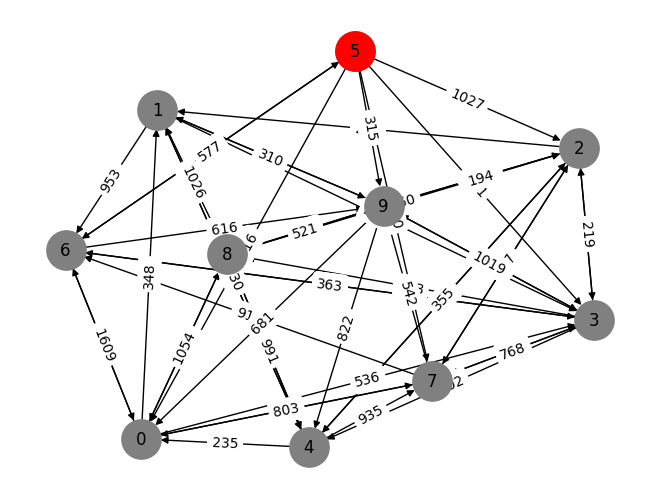

In [89]:
def initialize_economy(num_individuals, initial_balance):
    """
    Initialize the economy with individuals and their initial balances.
    """
    economy = nx.DiGraph()
    for i in range(num_individuals):
        economy.add_node(i, initial_balance=initial_balance, balance=initial_balance)
    return economy

def add_transactions(economy, num_transactions, max_transaction_amount):
    """
    Add random transactions to the economy.
    """
    num_individuals = economy.number_of_nodes()
    for _ in range(num_transactions):
        source = random.randint(0, num_individuals - 1)
        target = random.randint(0, num_individuals - 1)
        while source == target:  # Ensure source and target are different
            target = random.randint(0, num_individuals - 1)
        amount = random.uniform(0, max_transaction_amount)
        if economy.has_edge(source, target):
            economy[source][target]['weight'] += amount
        else:
            economy.add_edge(source, target, weight=amount)

def simulate_economy(economy, threshold):
    """
    Simulate economic transactions until an individual's balance reaches a certain threshold.
    """
    num_simulations = 0
    while True:
        num_simulations += 1
        individuals = list(economy.nodes(data=True))
        random.shuffle(individuals)  # Shuffle to randomize transaction order
        for node, data in individuals:
            balance = data['balance']
            if balance <= 0:
                return node, num_simulations, "balance_zero"  # Return index of individual with zero balance and num_simulations
            elif balance >= threshold:
                return node, num_simulations, "balance_double"  # Return index of individual with double balance and num_simulations
            neighbors = list(economy.neighbors(node))
            if neighbors:
                recipient = random.choice(neighbors)
                amount = min(balance, economy[node][recipient]['weight'])
                economy.nodes[node]['balance'] -= amount
                economy.nodes[recipient]['balance'] += amount
                economy[node][recipient]['weight'] -= amount
                if economy[node][recipient]['weight'] <= 0:
                    economy.remove_edge(node, recipient)

def plot_economy(economy, bankrupt_node=None, threshold_node=None):
    """
    Plot the graph representing the economy.
    """
    pos = nx.spring_layout(economy)
    nx.draw(economy, pos, with_labels=True, node_size=800, node_color='gray', font_color='black')

    if bankrupt_node is not None:
        nx.draw_networkx_nodes(economy, pos, nodelist=[bankrupt_node], node_size=800, node_color='red')

    if threshold_node is not None:
        nx.draw_networkx_nodes(economy, pos, nodelist=[threshold_node], node_size=800, node_color='red')

    labels = nx.get_edge_attributes(economy, 'weight')
    labels = {edge: int(weight) for edge, weight in labels.items()}  # Round weights
    nx.draw_networkx_edge_labels(economy, pos, edge_labels=labels)

    plt.show()

def main():
    num_individuals = 10
    initial_balance = 1500
    num_transactions = 600
    max_transaction_amount = 200
    threshold = initial_balance * 3  # Change threshold for double balance

    economy = initialize_economy(num_individuals, initial_balance)
    add_transactions(economy, num_transactions, max_transaction_amount)

    bankrupt_node, num_simulations, reason = simulate_economy(economy, threshold)
    if reason == "balance_zero":
        print(f"Individual {bankrupt_node} has gone bankrupt after {num_simulations} simulations.")
        plot_economy(economy, bankrupt_node)
    elif reason == "balance_double":
        print(f"Individual {bankrupt_node} has reached triple their initial balance after {num_simulations} simulations.")
        plot_economy(economy, threshold_node=bankrupt_node)

if __name__ == "__main__":
    main()
    

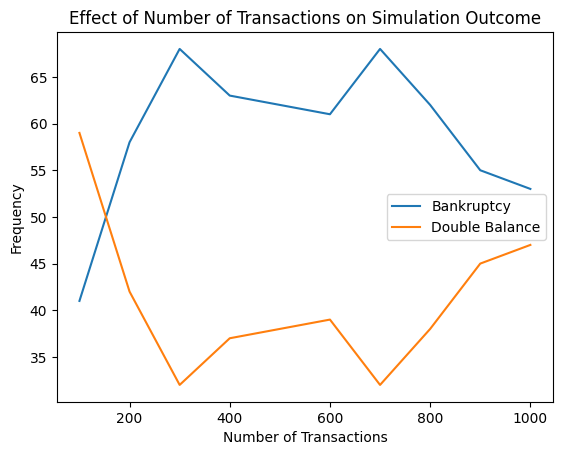

In [85]:
def run_simulation(num_transactions):
    economy = initialize_economy(num_individuals, initial_balance)
    add_transactions(economy, num_transactions, max_transaction_amount)

    bankrupt_count = 0
    double_count = 0

    for _ in range(num_simulations):
        individual, _, reason = simulate_economy(economy, threshold)
        if reason == "balance_zero":
            bankrupt_count += 1
        elif reason == "balance_double":
            double_count += 1

    return bankrupt_count, double_count

def test_scenario(num_transactions_range):
    bankrupt_counts = []
    double_counts = []

    for num_transactions in num_transactions_range:
        bankrupt_count, double_count = run_simulation(num_transactions)
        bankrupt_counts.append(bankrupt_count)
        double_counts.append(double_count)

    return bankrupt_counts, double_counts

# Define parameters
num_individuals = 10
initial_balance = 1000
num_simulations = 100
max_transaction_amount = 300
threshold = initial_balance * 2

# Test scenario with varying numbers of transactions
#num_transactions_range = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 100000]
num_transactions_range = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bankrupt_counts, double_counts = test_scenario(num_transactions_range)

# Plot results
plt.plot(num_transactions_range, bankrupt_counts, label='Bankruptcy')
plt.plot(num_transactions_range, double_counts, label='Double Balance')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.title('Effect of Number of Transactions on Simulation Outcome')
plt.legend()
plt.show()